In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential,datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

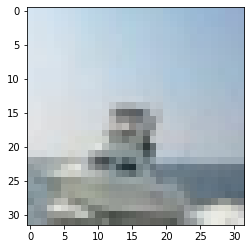

In [8]:
plt.imshow(x_train[100])

In [9]:
y_train[100]

array([8], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
#makine etiketler metin olduğunda anlamaz bu yüzden etiketleri makinenin anlacağı şekilde sayı dizisine çevirdik
num_classes=10
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [16]:
#Normalizing
x_train=x_train/255
x_test=x_test/255

In [17]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(num_classes, activation='softmax'))

In [18]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 280s 358ms/step - loss: 1.7590 - accuracy: 0.4526 - val_loss: 1.4092 - val_accuracy: 0.5425
Epoch 2/10
782/782 [==============================] - 281s 359ms/step - loss: 1.0892 - accuracy: 0.6299 - val_loss: 0.9880 - val_accuracy: 0.6782
Epoch 3/10
782/782 [==============================] - 281s 360ms/step - loss: 0.8715 - accuracy: 0.6978 - val_loss: 1.0728 - val_accuracy: 0.6699
Epoch 4/10
782/782 [==============================] - 283s 362ms/step - loss: 0.7593 - accuracy: 0.7359 - val_loss: 0.7232 - val_accuracy: 0.7515
Epoch 5/10
782/782 [==============================] - 283s 362ms/step - loss: 0.6750 - accuracy: 0.7646 - val_loss: 0.6761 - val_accuracy: 0.7690
Epoch 6/10
782/782 [==============================] - 283s 362ms/step - loss: 0.6165 - accuracy: 0.7859 - val_loss: 0.6018 - val_accuracy: 0.7912
Epoch 7/10
782/782 [==============================] - 284s 363ms/step - loss: 0.5696 - accuracy: 0.8016 - val_loss: 0.7904 -

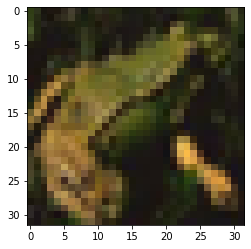

In [20]:
plt.imshow(x_test[41])

In [21]:
y_predict=model.predict(x_test[41][None,:])

1/1 [==============================] - 0s 166ms/step


In [22]:
y_predict

array([[1.8804039e-05, 2.3706556e-05, 8.9869613e-04, 2.2272192e-04,
        1.1593376e-05, 1.6495183e-05, 9.9864322e-01, 7.9489528e-06,
        3.2169257e-05, 1.2468059e-04]], dtype=float32)

In [23]:
def show_imgs(x):
    plt.figure(1,figsize=(10,10))
    k=0
    for i in range(0,4):
        for j in range(0,4):
            plt.subplot2grid((4,4),(i,j))
            plt.title('Actual:'+str(np.argmax(y_test[k]))+'Predict:'+ str(np.argmax(model.predict(x_test[k][None,:]))))
            plt.imshow(np.squeeze(x[k]),cmap='gray')
            k=k+1
    plt.tight_layout()

1/1 [==============================] - 0s 21ms/step
Actual: [3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8]
1/1 [==============================] - 0s 38ms/step
Predict: [3, 8, 8, 8, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8]


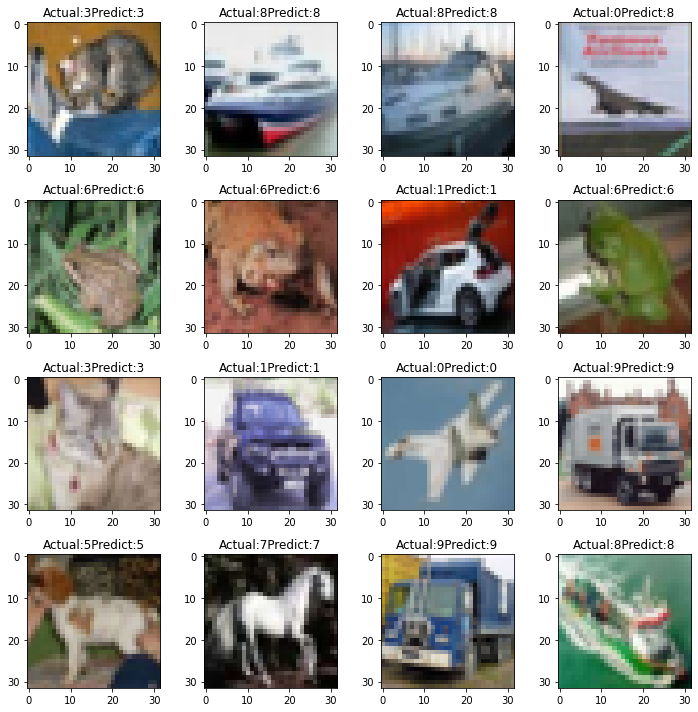

In [24]:
show_imgs(x_test[:16])
print('Actual:'  ,[x for x in np.argmax(y_test[:16],1)])
print('Predict:'  ,[x for x in np.argmax(model.predict(x_test[:16]),1)])